In [1]:
import tensorflow.keras.layers as L
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Формирование синтетического датасета

In [157]:
def make_pattern(l1, l2, l3, l4, noise):
    d = 2*np.random.random() - 1
    values = [0]*l1 + [10+d]*l2 + [5+d]*l3 + [3+d]*l4 + [0]
    return values

In [158]:
N = 15
xs = []
ys = []
for i in range(N):
    l1, l2, l3, l4 = 10, 10, 10, 4
    xs += list(range(i*35, i*35+35))
    ys += make_pattern(l1, l2, l3, l4, 0)
    

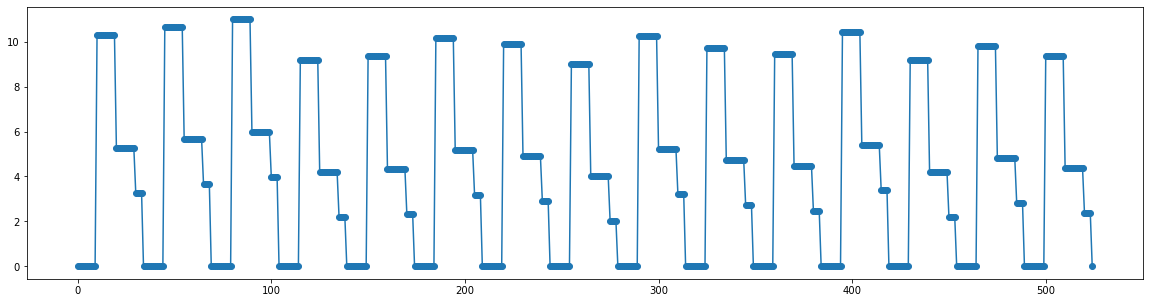

In [159]:
plt.figure(figsize=(20,5))
plt.scatter(xs, ys)
plt.plot(xs, ys)
plt.show()

Создадим 1000 сэмплов одинаковой длины.

In [160]:
N = 1000

X = []

for i in range(N):
    X.append(make_pattern(10,10,10,4,0))

X_noise = make_pattern(10,10,10,4,0)
X_noise[10] = 20

X_noise_2 = make_pattern(10,10,10,4,0)
X_noise_2[15] = 0
X_noise_2[16] = 0

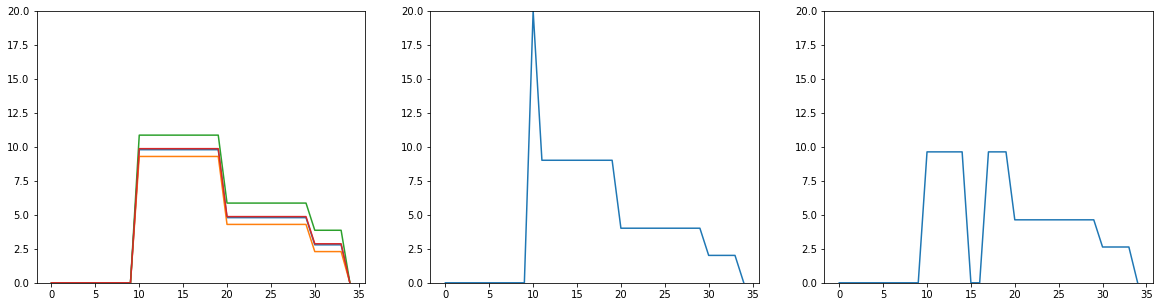

In [162]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.ylim(0,20)
plt.plot(X[1]); plt.plot(X[10]); plt.plot(X[100]); plt.plot(X[500])

plt.subplot(132)
plt.ylim(0,20)
plt.plot(X_noise)

plt.subplot(133)
plt.ylim(0,20)
plt.plot(X_noise_2)

plt.show()

# Реализация метода с автоэнкодером

In [163]:
X = np.array(X)
X_noise = np.array(X_noise)
X_noise_2 = np.array(X_noise_2)

X.shape

(1000, 35)

In [164]:
model = Sequential()
model.add(L.Dense(35, input_shape=(35,), activation='relu'))
model.add(L.Dense(5, activation='relu'))
model.add(L.Dense(35, activation=None))

In [165]:
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])

In [166]:
history = model.fit(X,X,epochs=100, verbose=0)

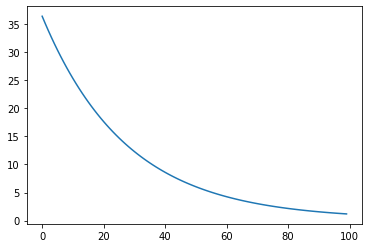

In [167]:
plt.plot(history.history["mse"])

In [173]:
model.evaluate(X[100].reshape(1,-1), X[100].reshape(1,-1))

1/1 [==============================] - 0s 12ms/step - loss: 2.7396 - mse: 2.7396


[2.739624500274658, 2.739624500274658]

In [176]:
model.predict(X)

array([[0.       , 0.       , 0.       , ..., 2.5216649, 2.5216649,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.5216649, 2.5216649,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.5216649, 2.5216649,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 2.5216649, 2.5216649,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.5216649, 2.5216649,
        0.       ],
       [0.       , 0.       , 0.       , ..., 2.5216649, 2.5216649,
        0.       ]], dtype=float32)

In [174]:
model.evaluate(X_noise.reshape(1,-1), X_noise.reshape(1,-1))

1/1 [==============================] - 0s 10ms/step - loss: 3.9834 - mse: 3.9834


[3.9833784103393555, 3.9833784103393555]

In [175]:
model.evaluate(X_noise_2.reshape(1,-1), X_noise_2.reshape(1,-1))

1/1 [==============================] - 0s 9ms/step - loss: 4.8751 - mse: 4.8751


[4.8751139640808105, 4.8751139640808105]

#  Реализация для сэмплов переменной длины (рекуррентные сети)